In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [2]:
#reading in Google Trend Scores for queries of "Elon Musk"
colnames=['Datetime', 'Score', 'Y'] 
etrend = pd.read_csv("../../data/elon_google_trend_new.csv",names=colnames, header=None).drop(columns=['Y'])

In [3]:
etrend.head()

,Datetime,Score
0,2016/5/29,9
1,2016/6/5,8
2,2016/6/12,6
3,2016/6/19,7
4,2016/6/26,5


In [4]:
etrend.tail()

,Datetime,Score
146,2019/3/17,14
147,2019/3/24,11
148,2019/3/31,25
149,2019/4/7,13
150,2019/4/14,15


In [5]:
I=etrend["Score"].idxmax()
I

88

In [6]:
etrend.iloc[I,:]

Datetime    2018/2/4
Score            100
Name: 88, dtype: object

In [7]:
etrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
Datetime    151 non-null object
Score       151 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
etrend.sort_values(by=["Score"],ascending=False).head()

,Datetime,Score
88,2018/2/4,100
118,2018/9/2,67
119,2018/9/9,55
101,2018/5/6,49
122,2018/9/30,49


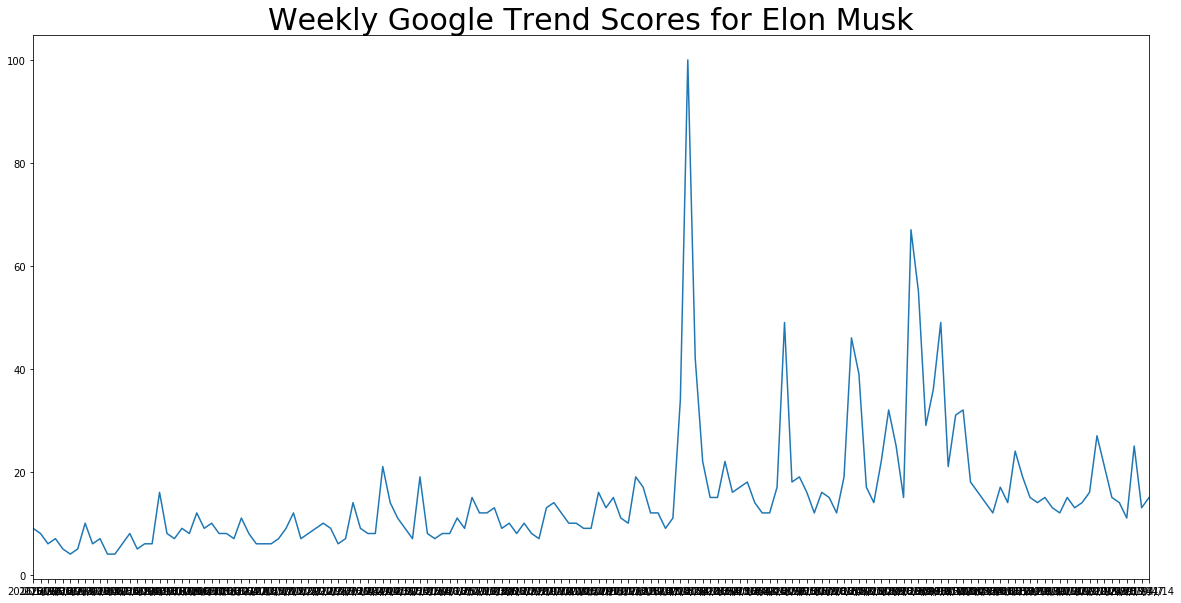

In [9]:
#plot the GoogleTrend scores over time
x=etrend["Datetime"]
y=etrend["Score"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title("Weekly Google Trend Scores for Elon Musk", fontsize=30)
ax.set_xlim(('2016/5/29', '2019/4/14'))

plt.show()

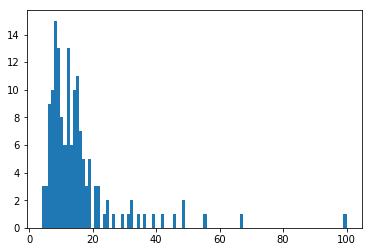

In [10]:
#distribution of scores
import matplotlib.pyplot as plt
plt.hist(etrend["Score"], bins=100)
plt.show()


In [11]:
#convert string to datetime
etrend["Date"]=pd.to_datetime(etrend["Datetime"])
etrend=etrend.drop(columns=["Datetime"])

In [12]:
etrend.head()

,Score,Date
0,9,2016-05-29
1,8,2016-06-05
2,6,2016-06-12
3,7,2016-06-19
4,5,2016-06-26


In [13]:
#obtain year and month columns
etrend['year']= etrend['Date'].dt.year
etrend['month']=etrend['Date'].dt.month

In [14]:
etrend.head()

,Score,Date,year,month
0,9,2016-05-29,2016,5
1,8,2016-06-05,2016,6
2,6,2016-06-12,2016,6
3,7,2016-06-19,2016,6
4,5,2016-06-26,2016,6


In [15]:
#divide data according to year
etrend_2016=etrend[etrend["year"]==2016]
etrend_2016.head()

,Score,Date,year,month
0,9,2016-05-29,2016,5
1,8,2016-06-05,2016,6
2,6,2016-06-12,2016,6
3,7,2016-06-19,2016,6
4,5,2016-06-26,2016,6


In [16]:
etrend_2017=etrend[etrend["year"]==2017].reset_index()
etrend_2017.head()

,index,Score,Date,year,month
0,31,6,2017-01-01,2017,1
1,32,6,2017-01-08,2017,1
2,33,7,2017-01-15,2017,1
3,34,9,2017-01-22,2017,1
4,35,12,2017-01-29,2017,1


In [17]:
etrend_2018=etrend[etrend["year"]==2018].reset_index()
etrend_2018.head()

,index,Score,Date,year,month
0,84,12,2018-01-07,2018,1
1,85,9,2018-01-14,2018,1
2,86,11,2018-01-21,2018,1
3,87,34,2018-01-28,2018,1
4,88,100,2018-02-04,2018,2


In [18]:
etrend_2019=etrend[etrend["year"]==2019].reset_index()
etrend_2019.head()

,index,Score,Date,year,month
0,136,15,2019-01-06,2019,1
1,137,13,2019-01-13,2019,1
2,138,12,2019-01-20,2019,1
3,139,15,2019-01-27,2019,1
4,140,13,2019-02-03,2019,2


In [19]:
#sum up each month's weekly google trend score as the monthly google trend score
m1=etrend_2016.groupby('month',as_index=False)['Score'].sum()
m1["year"]=etrend_2016["year"]
m1


,month,Score,year
0,5,9,2016
1,6,26,2016
2,7,32,2016
3,8,22,2016
4,9,33,2016
5,10,44,2016
6,11,35,2016
7,12,32,2016


In [20]:
type(m1)

pandas.core.frame.DataFrame

In [21]:
m2=etrend_2017.groupby('month',as_index=False)['Score'].sum()
m2["year"]=etrend_2017["year"]
m2

,month,Score,year
0,1,40,2017
1,2,34,2017
2,3,36,2017
3,4,60,2017
4,5,46,2017
5,6,31,2017
6,7,59,2017
7,8,40,2017
8,9,38,2017
9,10,55,2017


In [22]:
m3=etrend_2018.groupby('month',as_index=False)['Score'].sum()
m3["year"]=etrend_2018["year"]
m3

,month,Score,year
0,1,66,2018
1,2,179,2018
2,3,70,2018
3,4,73,2018
4,5,102,2018
5,6,55,2018
6,7,135,2018
7,8,94,2018
8,9,236,2018
9,10,102,2018


In [23]:
m4=etrend_2019.groupby('month',as_index=False)['Score'].sum()
m4["year"]=etrend_2019["year"]
m4

,month,Score,year
0,1,55,2019
1,2,70,2019
2,3,86,2019
3,4,28,2019


In [24]:
#combine
frames = [m1, m2, m3, m4]
a=pd.concat(frames).reset_index().drop(columns=["index"])
a

,month,Score,year
0,5,9,2016
1,6,26,2016
2,7,32,2016
3,8,22,2016
4,9,33,2016
5,10,44,2016
6,11,35,2016
7,12,32,2016
8,1,40,2017
9,2,34,2017


In [25]:
#read in elon's tweets, filtered using "tesla"
elon = pd.read_csv("../../data/twitter/elon_main_2019_05_07_jing.csv")
elon.head()

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False


In [26]:
#obtaining "Datetime", year, month, day, date and day of week columns 
elon["Datetime"]=pd.to_datetime(elon["Datetime"],utc=False)
elon['year']= elon['Datetime'].dt.year
elon['month']=elon['Datetime'].dt.month
elon['day']=elon['Datetime'].dt.day
elon['date']=elon['Datetime'].dt.date
elon['DayofWeek']=elon['Datetime'].dt.weekday

In [27]:
elon.head()

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False,2019,4,14,2019-04-14,6
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False,2019,4,14,2019-04-14,6
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False,2019,4,14,2019-04-14,6
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6


In [28]:
#append google trend score to tweet according to year and month the tweet was published in 
elon["gtrend"]=elon["year"]
for i in range(772):
    if elon["year"][i]==2016:
        if elon["month"][i]==5:
            elon["gtrend"][i]=a["Score"][0]
        elif elon["month"][i]==6:
            elon["gtrend"][i]=a["Score"][1]
        elif elon["month"][i]==7:
            elon["gtrend"][i]=a["Score"][2]
        elif elon["month"][i]==8:
            elon["gtrend"][i]=a["Score"][3]
        elif elon["month"][i]==9:
            elon["gtrend"][i]=a["Score"][4]
        elif elon["month"][i]==10:
            elon["gtrend"][i]=a["Score"][5]
        elif elon["month"][i]==11:
            elon["gtrend"][i]=a["Score"][6]
        elif elon["month"][i]==12:
            elon["gtrend"][i]=a["Score"][7]
        else:
            elon["gtrend"][i]=0
    elif elon["year"][i]==2017:
        if elon["month"][i]==1:
            elon["gtrend"][i]=a["Score"][8]
        elif elon["month"][i]==2:
            elon["gtrend"][i]=a["Score"][9]
        elif elon["month"][i]==3:
            elon["gtrend"][i]=a["Score"][10]
        elif elon["month"][i]==4:
            elon["gtrend"][i]=a["Score"][11]
        elif elon["month"][i]==5:
            elon["gtrend"][i]=a["Score"][12]
        elif elon["month"][i]==6:
            elon["gtrend"][i]=a["Score"][13]
        elif elon["month"][i]==7:
            elon["gtrend"][i]=a["Score"][14]
        elif elon["month"][i]==8:
            elon["gtrend"][i]=a["Score"][15]
        elif elon["month"][i]==9:
            elon["gtrend"][i]=a["Score"][16]
        elif elon["month"][i]==10:
            elon["gtrend"][i]=a["Score"][17]
        elif elon["month"][i]==11:
            elon["gtrend"][i]=a["Score"][18]
        else:
            elon["gtrend"][i]=a["Score"][19]
            
    elif elon["year"][i]==2018:
        if elon["month"][i]==1:
            elon["gtrend"][i]=a["Score"][20]
        elif elon["month"][i]==2:
            elon["gtrend"][i]=a["Score"][21]
        elif elon["month"][i]==3:
            elon["gtrend"][i]=a["Score"][22]
        elif elon["month"][i]==4:
            elon["gtrend"][i]=a["Score"][23]
        elif elon["month"][i]==5:
            elon["gtrend"][i]=a["Score"][24]
        elif elon["month"][i]==6:
            elon["gtrend"][i]=a["Score"][25]
        elif elon["month"][i]==7:
            elon["gtrend"][i]=a["Score"][26]
        elif elon["month"][i]==8:
            elon["gtrend"][i]=a["Score"][27]
        elif elon["month"][i]==9:
            elon["gtrend"][i]=a["Score"][28]
        elif elon["month"][i]==10:
            elon["gtrend"][i]=a["Score"][29]
        elif elon["month"][i]==11:
            elon["gtrend"][i]=a["Score"][30]
        else:
            elon["gtrend"][i]=a["Score"][31]
    elif elon["year"][i]==2019:
        if elon["month"][i]==1:
            elon["gtrend"][i]=a["Score"][32]
        elif elon["month"][i]==2:
            elon["gtrend"][i]=a["Score"][33]
        elif elon["month"][i]==3:
            elon["gtrend"][i]=a["Score"][34]
        else:
            elon["gtrend"][i]=a["Score"][35]
    else:
        elon["gtrend"][i]=0
        
    

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [29]:
elon.head(150)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek,gtrend
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18,False,2019,4,14,2019-04-14,6,28
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18,False,2019,4,14,2019-04-14,6,28
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18,False,2019,4,14,2019-04-14,6,28
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,28
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dr...,1117563679099240449,NaN,False,NaN,1.117564e+18,False,2019,4,14,2019-04-14,6,28
5,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,True,2019,4,14,2019-04-14,6,28
6,6,2019-04-14 22:46:00+00:00,65,2181,deal,1117559770955812865,NaN,True,yourloyalpal,1.117554e+18,False,2019,4,14,2019-04-14,6,28
7,7,2019-04-14 22:21:00+00:00,4864,54282,please support my campaign to rebrand @ wsj as...,1117553530615648256,🧦,False,NaN,1.117554e+18,False,2019,4,14,2019-04-14,6,28
8,8,2019-04-14 22:17:00+00:00,2073,42205,"at some point, @ theonion and i should just a ...",1117552423373918208,NaN,False,NaN,1.117552e+18,False,2019,4,14,2019-04-14,6,28
9,9,2019-04-14 22:14:00+00:00,177,1979,just use this handy guidehttps://www.theonion....,1117551672039841793,NaN,True,techreview,1.117533e+18,False,2019,4,14,2019-04-14,6,28


In [30]:
elon.tail(150)
#for tweets published earlier than 2016, gtrend column score is simply the value of the year for the tweet
#in later notebooks, data earlier than 2016 was discarded

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,keyword,year,month,day,date,DayofWeek,gtrend
6101,6101,2012-05-11 00:47:00+00:00,128,28,landing gear of the mega thrust propulsive lan...,200748923239940096,NaN,False,NaN,2.007489e+17,False,2012,5,11,2012-05-11,4,2012
6102,6102,2012-05-10 16:24:00+00:00,44,18,meant to say: prizes for first 10 who do 400 m...,200622424037933056,NaN,False,NaN,2.006224e+17,True,2012,5,10,2012-05-10,3,2012
6103,6103,2012-05-09 23:54:00+00:00,105,24,model s exceeds 300 mile range target! prize f...,200373235748052994,NaN,False,NaN,2.003732e+17,False,2012,5,9,2012-05-09,2,2012
6104,6104,2012-05-08 05:45:00+00:00,50,17,saw the dictator yesterday. reminded me of put...,199736675537125376,NaN,False,NaN,1.997367e+17,False,2012,5,8,2012-05-08,1,2012
6105,6105,2012-05-05 01:05:00+00:00,66,26,@ geoffeg dragon code is written in c++ on linux.,198579161382649857,NaN,True,geoffeg,1.985781e+17,False,2012,5,5,2012-05-05,5,2012
6106,6106,2012-05-05 00:59:00+00:00,78,28,almost done reviewing dragon code with @ nasa....,198577657959563264,NaN,False,NaN,1.985777e+17,False,2012,5,5,2012-05-05,5,2012
6107,6107,2012-05-03 18:27:00+00:00,184,47,for humanity to have an exciting & inspiring f...,198116544855801856,NaN,True,love_to_dream,1.981026e+17,False,2012,5,3,2012-05-03,3,2012
6108,6108,2012-05-03 18:22:00+00:00,100,44,definitely. long term goal of spacex making li...,198115378759610368,NaN,True,Weaverwerx,1.980956e+17,False,2012,5,3,2012-05-03,3,2012
6109,6109,2012-05-03 18:15:00+00:00,10,32,"ignition by john clarke, huzel & wang book on ...",198113448628981760,NaN,True,WHester,1.981001e+17,False,2012,5,3,2012-05-03,3,2012
6110,6110,2012-04-30 20:22:00+00:00,150,30,"woohoo, rocket hold down firing completed and ...",197058383088586753,NaN,False,NaN,1.970584e+17,False,2012,4,30,2012-04-30,0,2012


In [31]:
#export elon as a pickle file
import pickle
with open('../../data/features/2019_05_07_ElonGoogleTrend_Jeff.pickle','wb') as handle: 
    pickle.dump(elon, handle,protocol=pickle.HIGHEST_PROTOCOL)